# Visualization to draw insights

Jayanand Hiremath

In [18]:
# Importing the required libraries for the project:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [16]:
db_user = 'root'
db_password = 'admin123'
db_host = 'localhost'
db_name = 'analysis'

In [17]:
sql_engine = create_engine(f"mysql+mysqlconnector://{db_user}:{db_password}@{db_host}/{db_name}")


In [24]:
# Testing the connection:

query_test = '''SELECT * FROM shopping_trends LIMIT 1'''
pd.read_sql(sql=query_test, con=sql_engine)

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly


Now lets perform some important visualizations that will help us identify the trends and insights

1. Total revenue by different category:

In [40]:
query1 = '''SELECT Category, SUM(`Purchase Amount (USD)`) as `total_revenue(USD)` FROM shopping_trends GROUP BY Category ORDER BY SUM(`Purchase Amount (USD)`) DESC'''

query1_result_df = pd.read_sql(sql=query1, con=sql_engine)
query1_result_df

,Category,total_revenue(USD)
0,Clothing,104264.0
1,Accessories,74200.0
2,Footwear,36093.0
3,Outerwear,18524.0


Plotting the suitable plot for this analysis

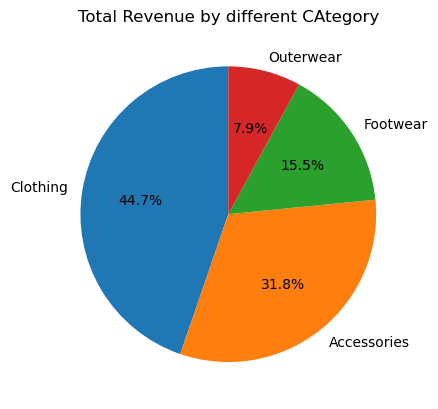

In [38]:
# Autopct will calculate the percentage and start angle is the point from where the plot begins:
plt.pie(x = query1_result_df['total_revenue(USD)'], labels=query1_result_df['Category'], autopct='%1.1f%%', startangle=90)
plt.title("Total Revenue by different CAtegory")
plt.show()


2. Most frequent payment methods preferred by the users:

In [41]:
query2 = '''SELECT `Preferred Payment Method`, COUNT(`Preferred Payment Method`) AS count FROM shopping_trends GROUP BY `Preferred Payment Method` ORDER BY COUNT(`Preferred Payment Method`) DESC;'''

query2_result_df = pd.read_sql(sql=query2,con=sql_engine)
query2_result_df

,Preferred Payment Method,count
0,PayPal,677
1,Credit Card,671
2,Cash,670
3,Debit Card,636
4,Venmo,634
5,Bank Transfer,612


As I plotting the frequency I prefer to use the horizontal bar plot to visualize this

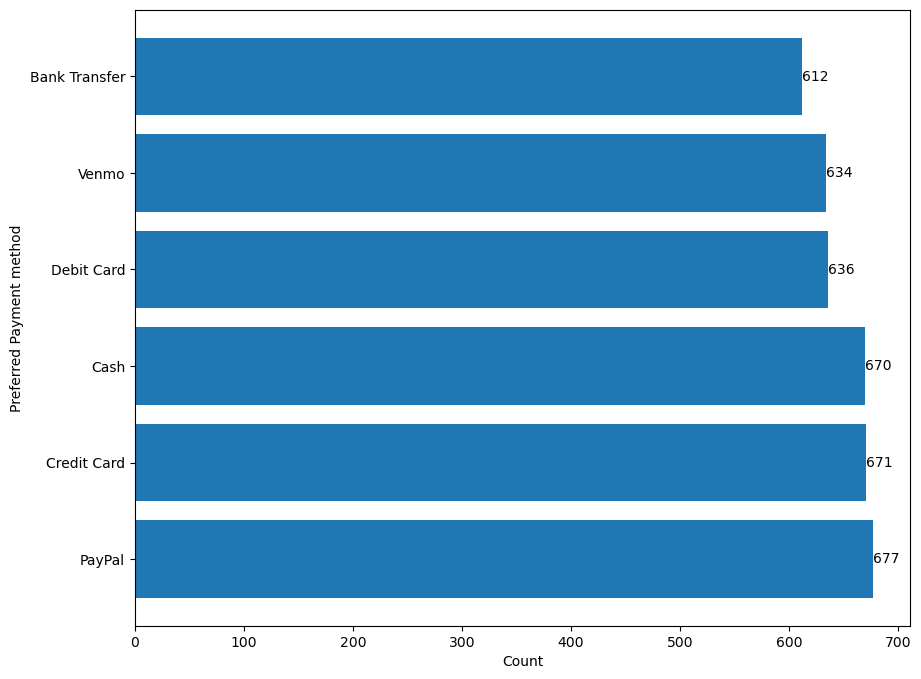

In [56]:
# Horizontal bar plot:
plt.figure(figsize=(10,8))
y = [i for i in query2_result_df['Preferred Payment Method']]
val = [i for i in query2_result_df['count']]
bars = plt.barh(y = y, width = val)
plt.xlabel("Count")
plt.ylabel("Preferred Payment method")

# Wanted to plot the count at the end of the bar to clarify the count:
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             str(int(bar.get_width())), va='center')
plt.show()

3. Identifying the total purchases from store in person (this will help to clarify whether to invest more in improving the store and aesthetics) if in store purchases are more than 15% then we can invest in improving:

In [57]:
query3 = '''
with
    store_pur as (
        select
            `Shipping Type`,
            count(`Shipping Type`) as count
        from
            shopping_trends
        where
            `Shipping Type` = 'Store Pickup'
        group by
            `Shipping Type`
    )
select
    round(
        (
            count / (
                select
                    count(*)
                from
                    shopping_trends
            )
        ) * 100,
        2
    ) as in_store_purchases_percentage
from
    store_pur
'''
query3_result_df = pd.read_sql(sql=query3, con=sql_engine)
query3_result_df

,in_store_purchases_percentage
0,16.67


As we can see that the percentage of in store purchases is more than the 15%. Hence we can invest in improving the store aesthetics.

In [59]:
query3_1 = '''SELECT `Shipping Type`, count(`Shipping Type`) as count FROM shopping_trends GROUP BY `Shipping Type` ORDER BY count(`Shipping Type`) DESC'''

query3_1_result_df = pd.read_sql(sql=query3_1, con=sql_engine)
query3_1_result_df

,Shipping Type,count
0,Free Shipping,675
1,Standard,654
2,Store Pickup,650
3,Next Day Air,648
4,Express,646
5,2-Day Shipping,627


Here we can plot the pie chart to identify the most frequent purchase type by percentage distrivution

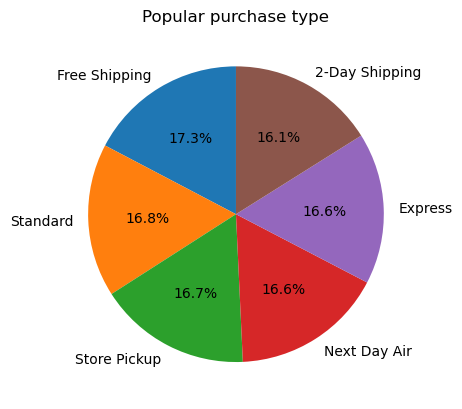

In [60]:
plt.pie(x = query3_1_result_df['count'], labels=query3_1_result_df['Shipping Type'], autopct='%1.1f%%', startangle=90)
plt.title("Popular purchase type")
plt.show()

Mostly all the shipping or purchase type are very similar

4. Plotting how many people have used promo codes to avail discounts on the purchases:

In [62]:
query4 = '''SELECT `Discount Applied`, COUNT(`Discount Applied`) as count FROM shopping_trends GROUP BY `Discount Applied` ORDER BY COUNT(`Discount Applied`) DESC;'''

query4_result_df = pd.read_sql(sql=query4, con=sql_engine)
query4_result_df

,Discount Applied,count
0,No,2223
1,Yes,1677


There is no particular function to plot the donut chart hence we use pie chart then insert a circle in the middle which basically gives us the donut chart

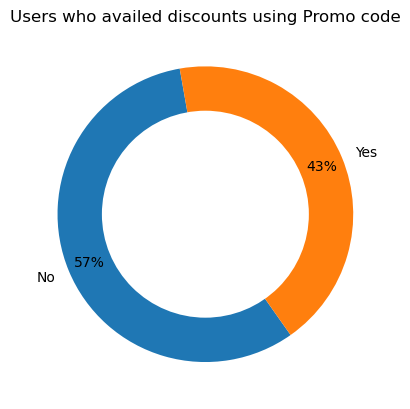

In [68]:
# Donut chart:

plt.pie(x = query4_result_df['count'], labels= query4_result_df['Discount Applied'], autopct= '%1.f%%', pctdistance=0.85, startangle= 100)
plt.gca().add_artist(plt.Circle((0, 0), 0.70, fc='white'))  # Add a circle in the center to create the donut shape

plt.title("Users who availed discounts using Promo code")
plt.show()

5. Identifying the High-value customers (Fashionista, Fashion enthusiasts) who have most purchases:

In [ ]:
query5 = 